In [1]:
from copy import copy

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

sns.set_theme()
warnings.filterwarnings('ignore')

In [2]:
problems = ["breast_cancer", "glass", "diabetes_classification"]

In [12]:
dfs = []
for w in ["win_1", "wfn_1", "win", "wfn", "wpgs", ""]:
    for problem in problems:
        for seed in range(5):
            for opt in ["adam", "gaussian", "cmaes"]:
                w_text = f"{w}_" if len(w) > 0 else ""
                if os.path.exists(f"../results/ga_{problem}_{opt}_{w_text}{seed}.pickle"):
                    tmp_df = pd.read_csv(f"../results/ga_{problem}_{opt}_{w_text}{seed}.csv")
                    tmp_df["seed"] = seed
                    tmp_df["w"] = w if len(w) > 0 else "no w"
                    tmp_df["opt"] = opt
                    tmp_df["problem"] = problem
                    tmp_df["total_time"] = tmp_df["time"].cumsum().astype(int)
                    tmp_df["data_points"] = tmp_df["iteration"] * (
                        1000 if opt == "gaussian" else 4200 if opt == "adam" else 7400)
                    dfs.append(tmp_df)
                else:
                    continue
df = pd.concat(dfs, ignore_index=True)
for idx in range(1,6):
    df.drop(columns=[f"rrmse_{idx}"], inplace=True)
df.rename(columns={"rrmse_0": "test_accuracy"}, inplace=True)
df.head()

,iteration,max_fitness,time,test_accuracy,seed,w,opt,problem,total_time,data_points
0,0,0.626761,0.000000,0.629371,0,win_1,adam,breast_cancer,0,0
1,1,0.626761,7.470216,0.629371,0,win_1,adam,breast_cancer,7,4200
2,2,0.626761,7.643053,0.629371,0,win_1,adam,breast_cancer,15,8400
3,3,0.626761,7.530684,0.629371,0,win_1,adam,breast_cancer,22,12600
4,4,0.626761,7.590975,0.629371,0,win_1,adam,breast_cancer,30,16800


In [13]:
max_iter = df.groupby(["w", "opt", "seed"])["iteration"].transform("max")
final_df = df[df["iteration"] == max_iter]
final_df

,iteration,max_fitness,time,test_accuracy,seed,w,opt,problem,total_time,data_points
356,356,0.626761,7.033249,0.629371,0,win_1,adam,breast_cancer,2724,1495200
1856,1499,0.626761,1.098909,0.629371,0,win_1,gaussian,breast_cancer,1756,1499000
2213,356,0.631455,7.128941,0.615385,1,win_1,adam,breast_cancer,2721,1495200
3713,1499,0.631455,1.171963,0.615385,1,win_1,gaussian,breast_cancer,1754,1499000
4070,356,0.633803,7.001169,0.608392,2,win_1,adam,breast_cancer,2717,1495200
...,...,...,...,...,...,...,...,...,...,...
155774,1499,0.642361,1.141596,0.677083,0,no w,gaussian,diabetes_classification,1750,1499000
157274,1499,0.654514,1.126314,0.640625,1,no w,gaussian,diabetes_classification,1745,1499000
158774,1499,0.635417,1.246955,0.697917,2,no w,gaussian,diabetes_classification,1746,1499000
160274,1499,0.673611,1.146293,0.583333,3,no w,gaussian,diabetes_classification,1750,1499000


In [7]:
reopt_dfs = []
for w in ["win_1", "wfn_1", "win", "wfn", "wpgs", ""]:
    for problem in problems:
        for seed in range(3):
            for reopt in ["adam", "cmaes"]:
                for opt in ["adam", "gaussian", "cmaes", "none"]:
                    try:
                        tmp_df = pd.read_csv(f"../results/ga_{problem}_{opt}_{w}_reopt-{reopt}_{seed}.csv")
                        tmp_df["seed"] = seed
                        tmp_df["w"] = w if len(w) > 0 else "no w"
                        tmp_df["opt"] = opt
                        tmp_df["reopt"] = reopt
                        tmp_df["problem"] = problem
                        reopt_dfs.append(tmp_df)
                    except FileNotFoundError:
                        pass
reopt_df = pd.concat(reopt_dfs, ignore_index=True)
reopt_df["test_increase"] = reopt_df["test_accuracy"] - reopt_df["previous_test_accuracy"]
reopt_df["train_increase"] = reopt_df["max_fitness"] - reopt_df["previous_max_fitness"]
reopt_df["equation"] = reopt_df["equation"].str.replace("<lambda>", "", regex=False)
reopt_df.head()

,iteration,time,max_fitness,test_accuracy,previous_max_fitness,previous_test_accuracy,equation,seed,w,opt,reopt,problem,test_increase,train_increase
0,0,759.614355,0.520804,0.541232,-118003.360,-147806.56,o0 = ((0.24*sqrt(0.23*(0.51*(0.39*(0.31*i5+0.5...,0,win_1,adam,adam,chemical_1_tower,147807.101232,118003.880804
1,0,553.889430,0.003013,0.014097,-117376.590,-144815.52,o0 = (sqrt(-0.00*(1.01*i10*-0.00*i5))),0,win_1,gaussian,adam,chemical_1_tower,144815.534097,117376.593013
2,0,2698.550613,0.005615,0.012216,-117376.590,-144815.52,o0 = (sqrt(0.00*(0.01*i10*-0.01*i5))),0,win_1,gaussian,cmaes,chemical_1_tower,144815.532216,117376.595615
3,0,2480.961821,0.534342,0.576105,-117388.410,-145510.56,o0 = ((0.12*log(0.30*(1.10*sin(0.93*sqrt(1.06*...,0,win_1,cmaes,cmaes,chemical_1_tower,145511.136105,117388.944342
4,0,754.432121,0.697772,0.728476,-117984.305,-142904.88,o0 = ((0.02*(2.89*(0.88*i5-2.11*i8)+2.30*(1.03...,1,win_1,adam,adam,chemical_1_tower,142905.608476,117985.002772


In [8]:
reopt_df.drop(columns=['iteration']).to_csv("equations.csv")

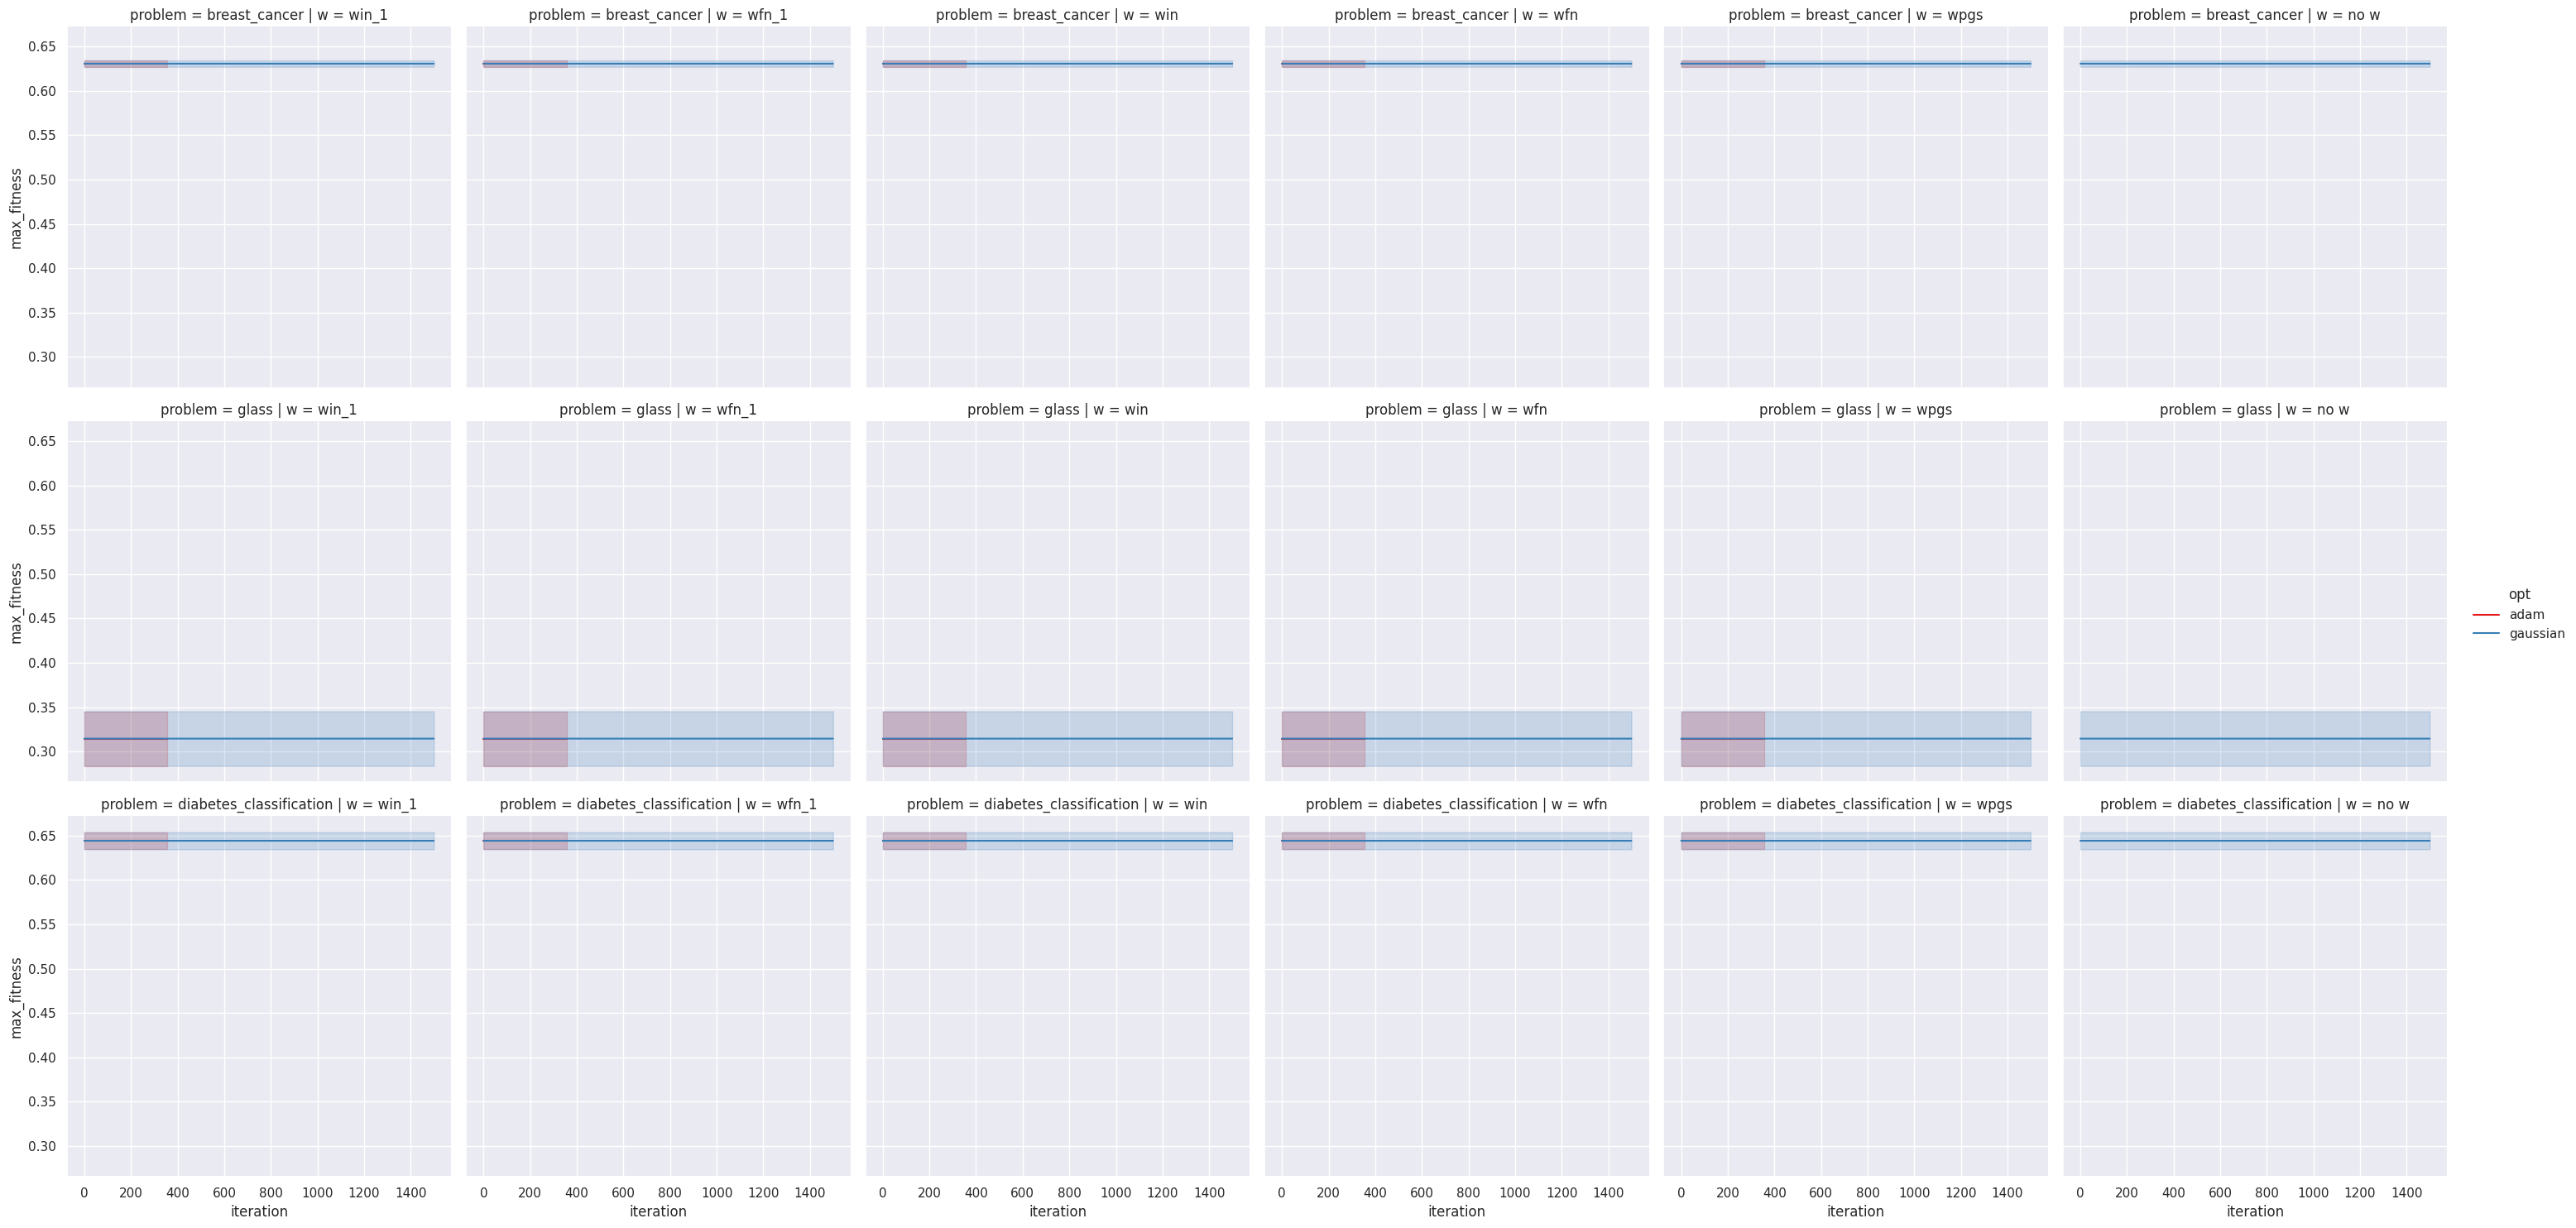

In [10]:
sns.relplot(data=df, x="iteration", y="max_fitness", hue="opt", col="w",
            row="problem", errorbar="sd", kind="line", palette="Set1")
plt.show()

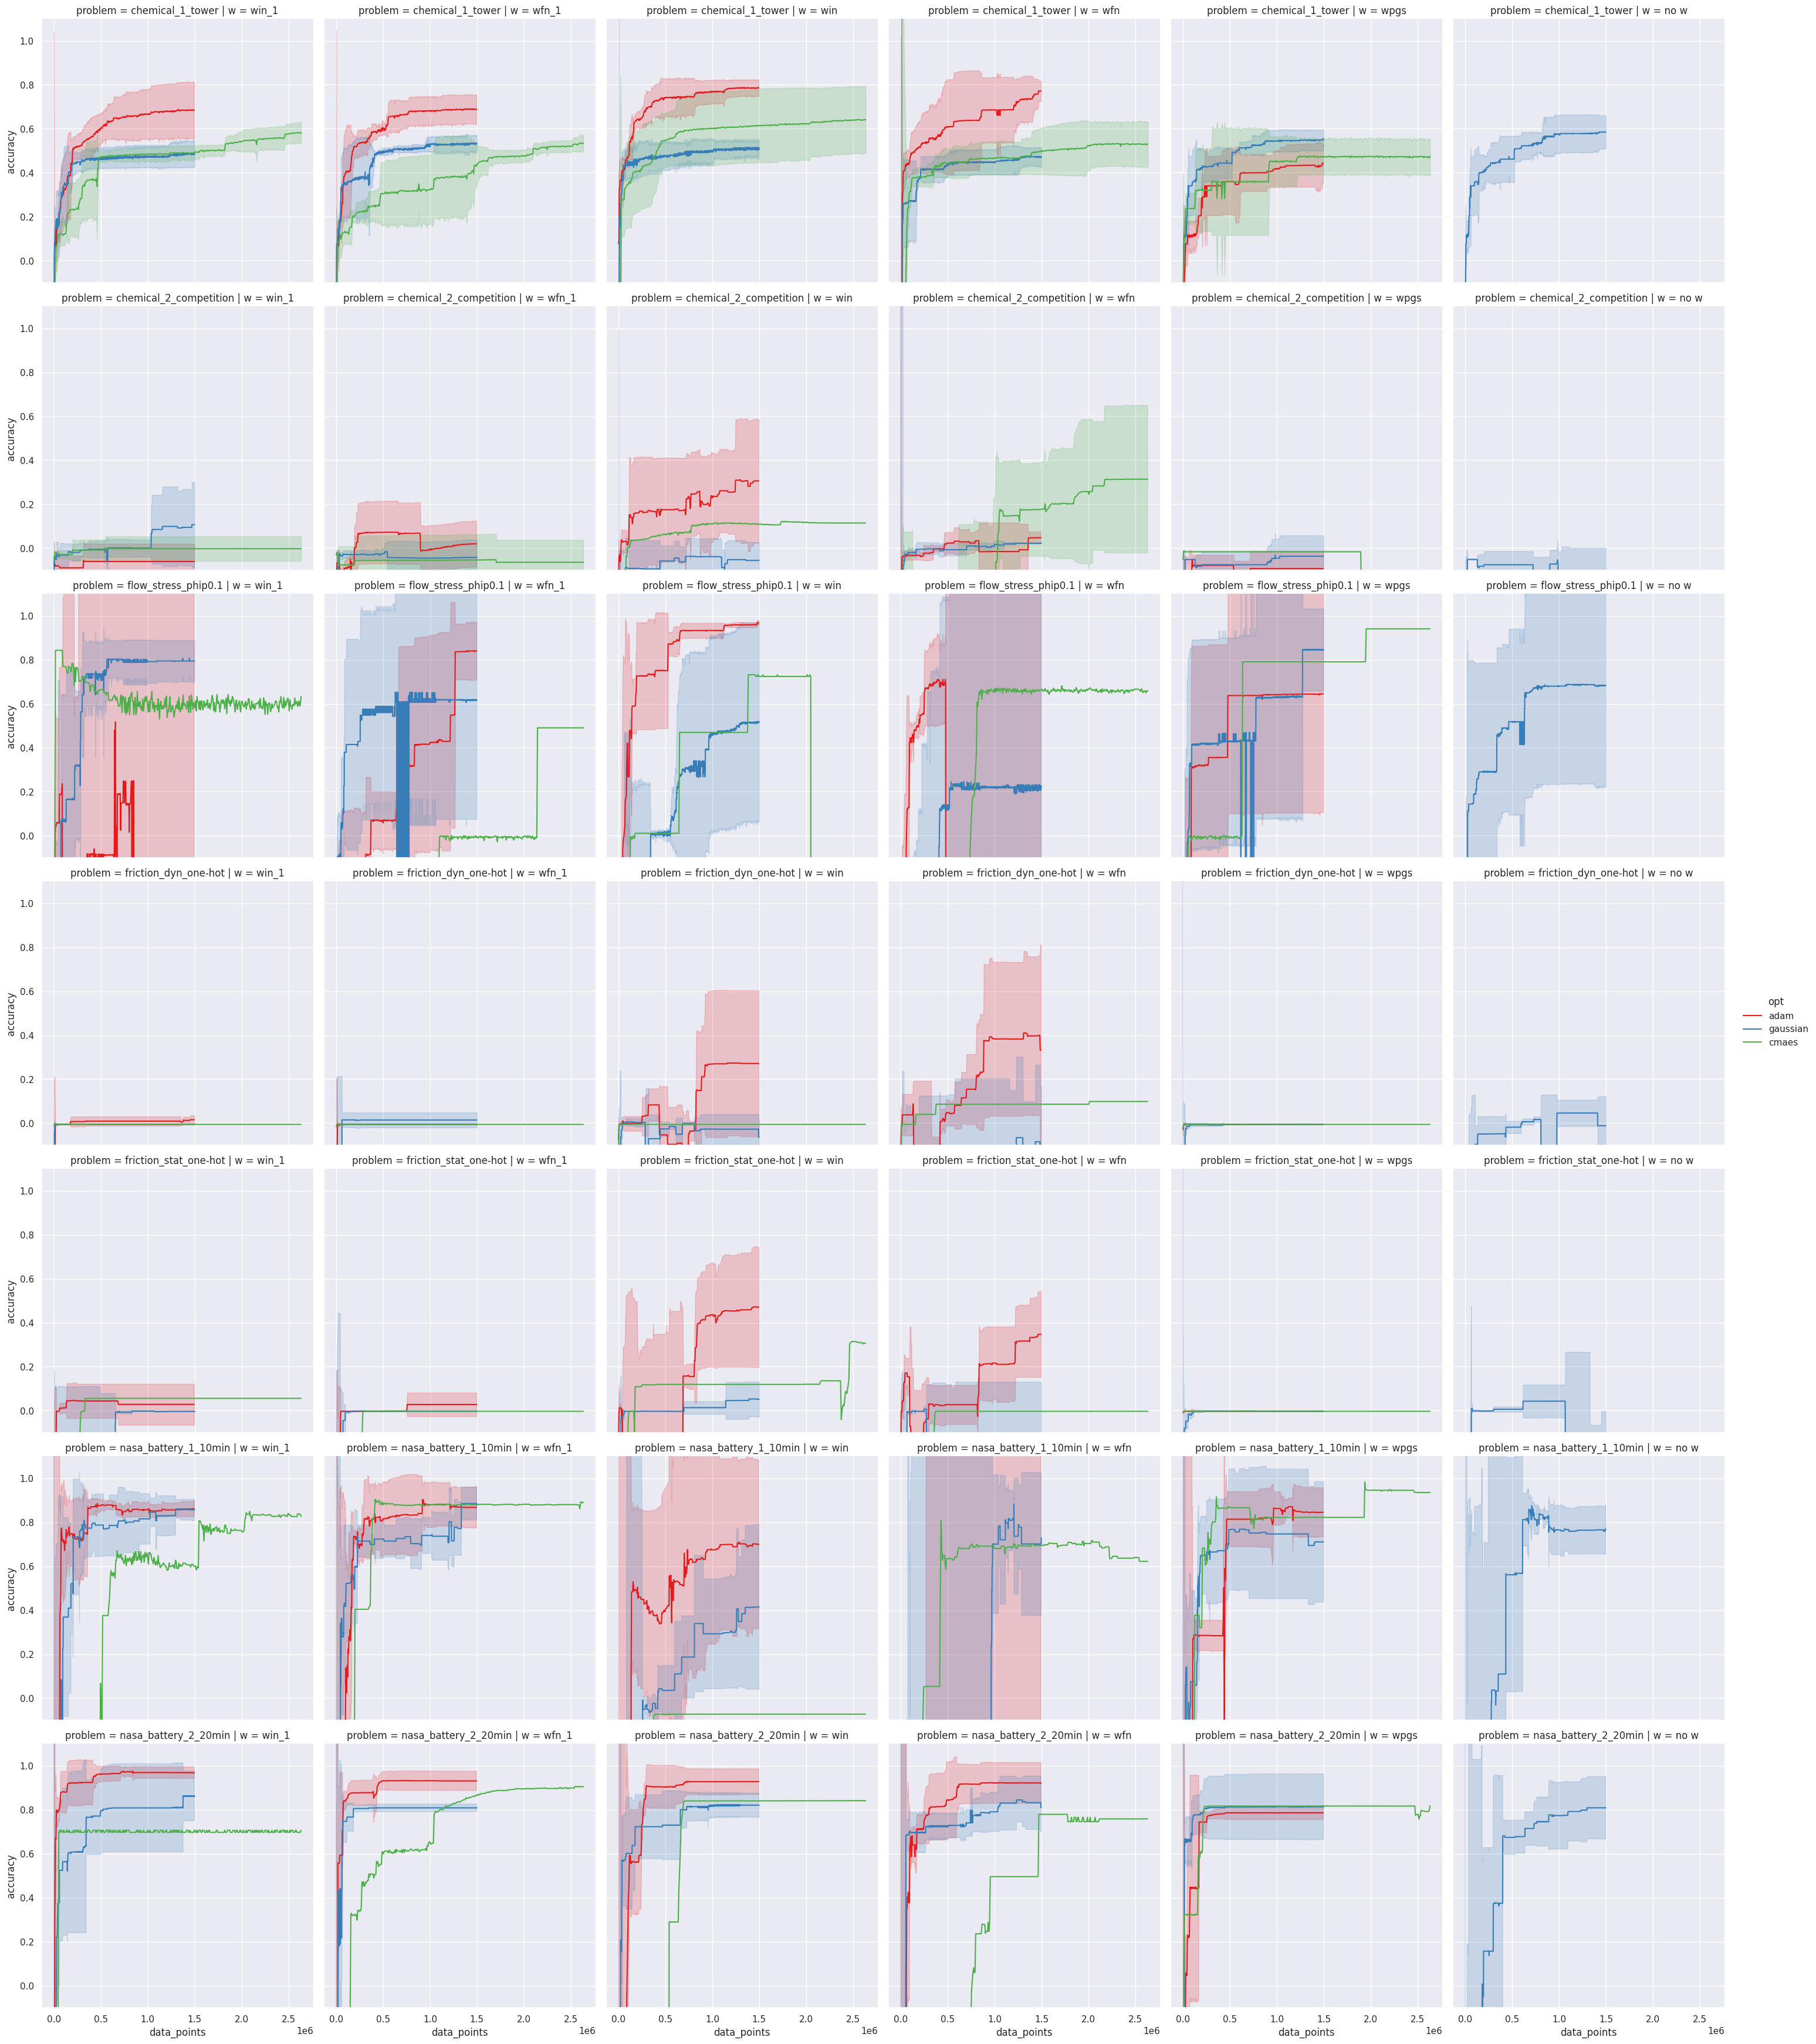

In [10]:
sns.relplot(data=df[df["when"] == "test"], x="data_points", y="accuracy", hue="opt", col="w",
            row="problem", errorbar="sd", kind="line", palette="Set1")
plt.ylim(-.1, 1.1)
plt.show()

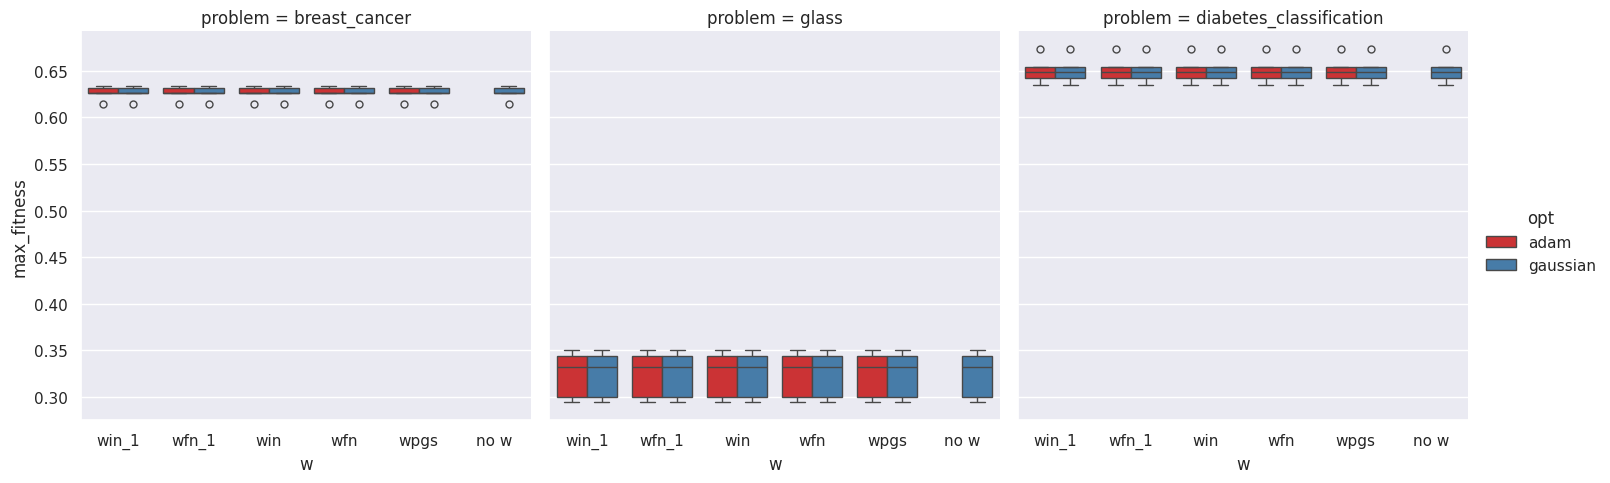

In [15]:
sns.catplot(x="w", y="max_fitness", hue="opt", data=final_df, col="problem", kind="box", palette="Set1")
# plt.ylim(-.3, 1.1)
plt.show()

In [12]:
final_df_for_baseline_merge = final_df[final_df["when"] == "test"][["seed", "w", "opt", "problem", "accuracy"]]
final_df_and_baseline = pd.concat([final_df_for_baseline_merge, baselines_df], ignore_index=True)
final_df_and_baseline.head()

,seed,w,opt,problem,accuracy
0,0,win_1,adam,chemical_1_tower,0.541526
1,0,win_1,gaussian,chemical_1_tower,0.416718
2,0,win_1,cmaes,chemical_1_tower,0.582662
3,1,win_1,adam,chemical_1_tower,0.727581
4,1,win_1,gaussian,chemical_1_tower,0.528376


In [22]:
reopt_df_for_baseline_merge = reopt_df[["seed", "w", "opt", "reopt", "problem", "test_accuracy"]]
reopt_df_for_baseline_merge.rename(columns={"test_accuracy": "accuracy"}, inplace=True)
baselines_df.rename(columns={"opt": "reopt"}, inplace=True)
baselines_df["opt"] = "none"
reopt_df_and_baseline = pd.concat([reopt_df_for_baseline_merge, baselines_df], ignore_index=True)

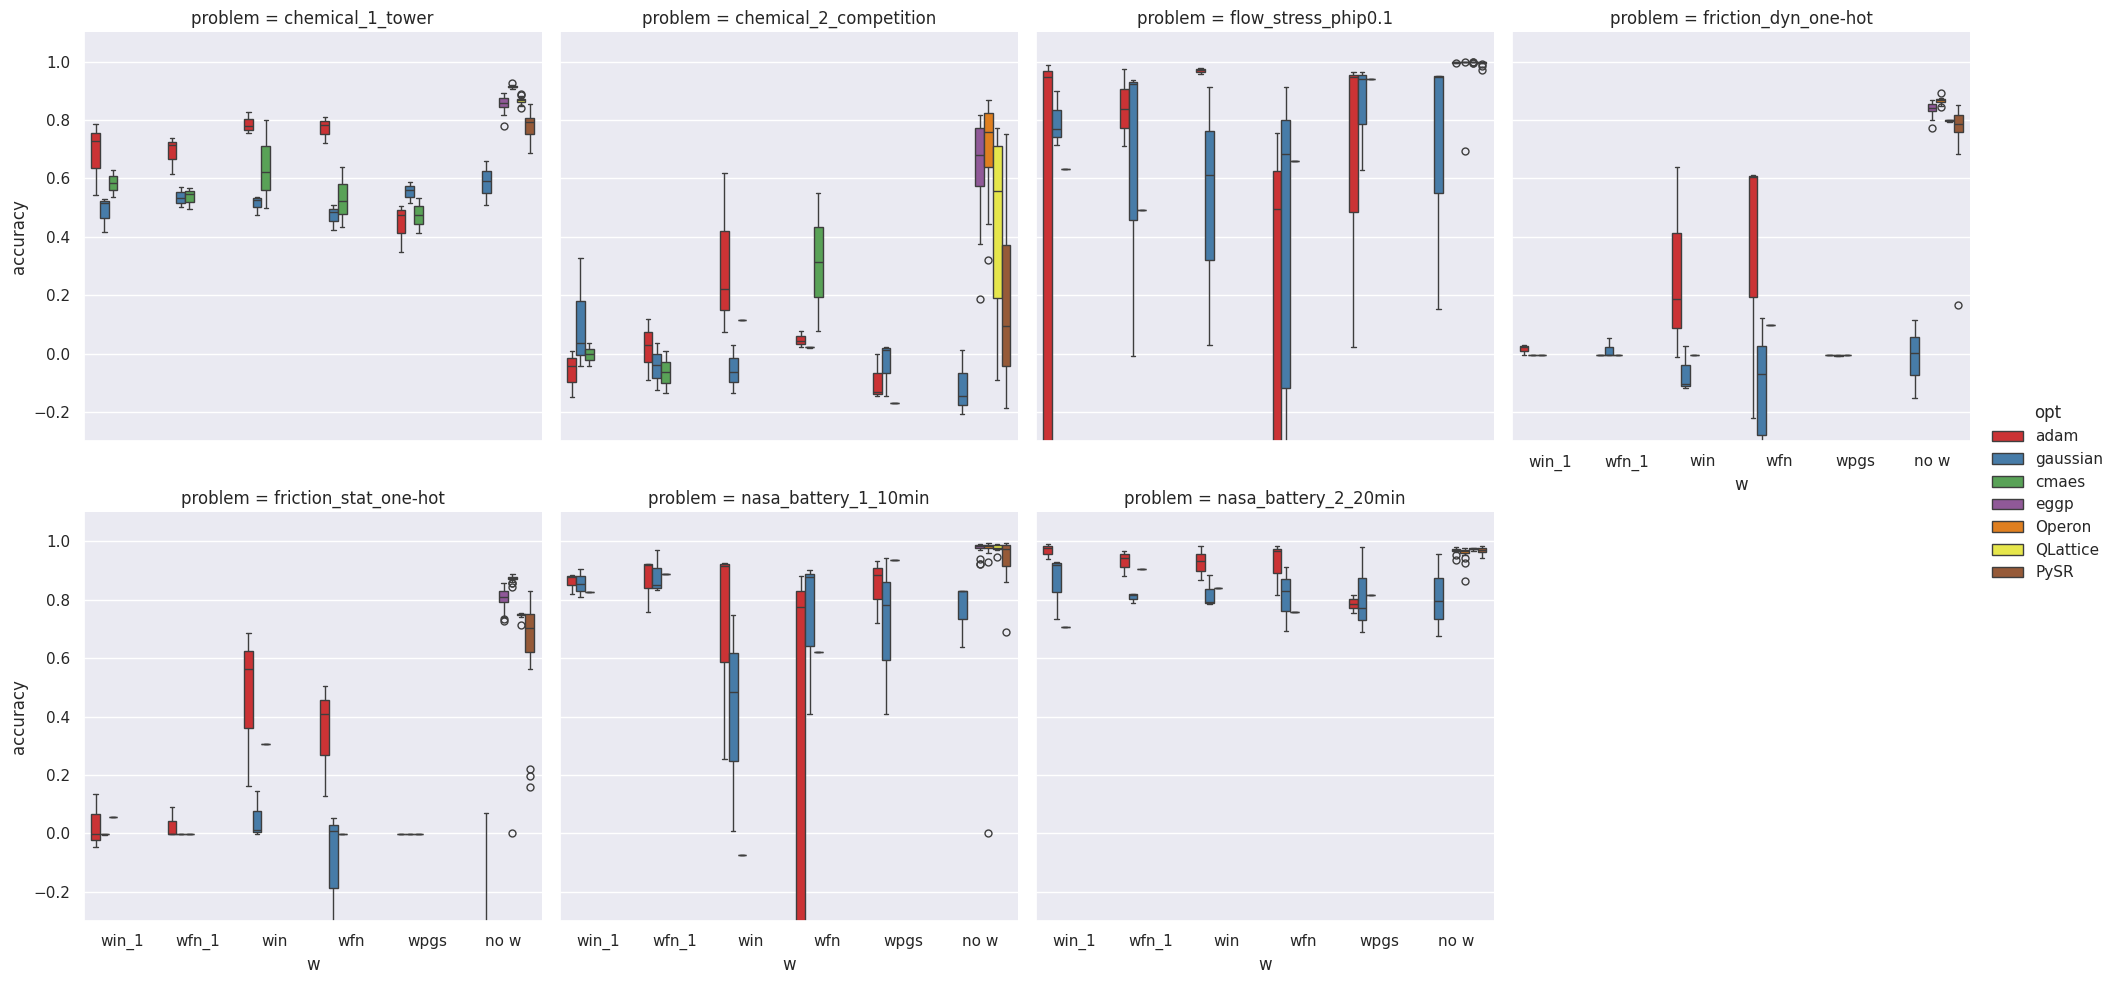

In [27]:
sns.catplot(x="w", y="accuracy", hue="opt", data=final_df_and_baseline, col="problem", col_wrap=4,
            kind="box", palette="Set1")
plt.ylim(-.3, 1.1)
plt.show()

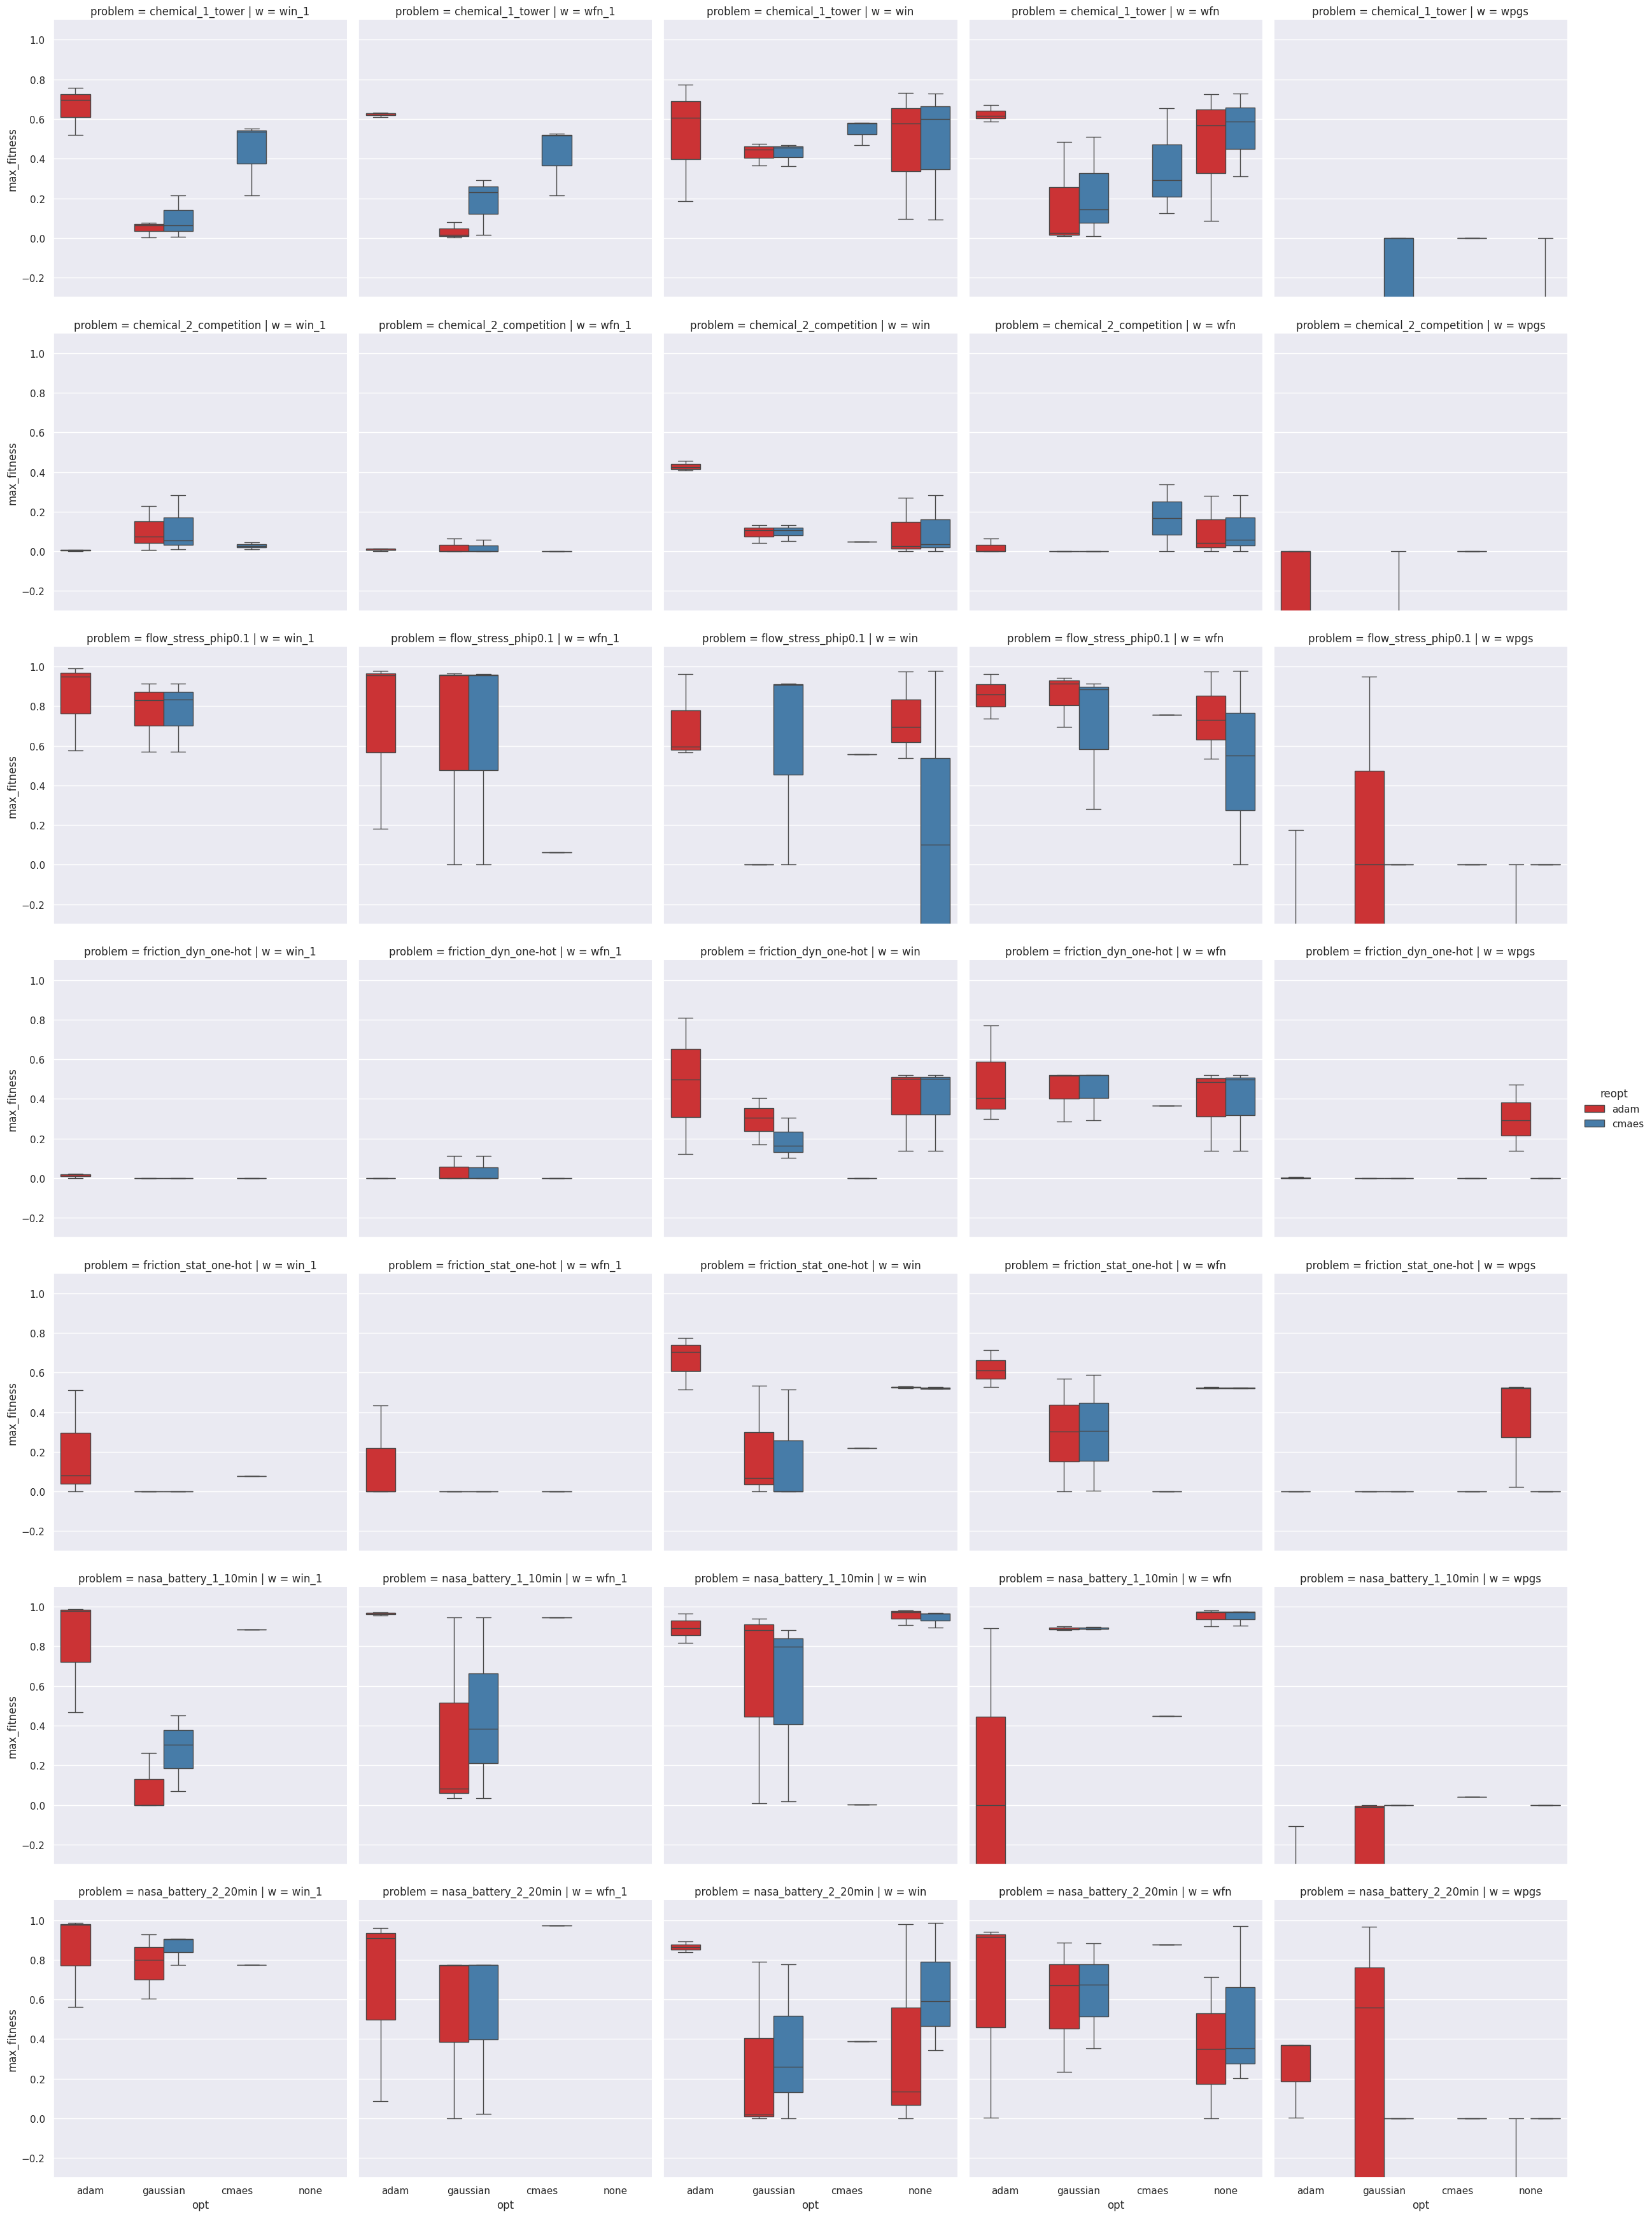

In [37]:
sns.catplot(x="opt", y="max_fitness", hue="reopt", data=reopt_df, col="w", row="problem", kind="box", palette="Set1")
plt.ylim(-.3, 1.1)
plt.show()

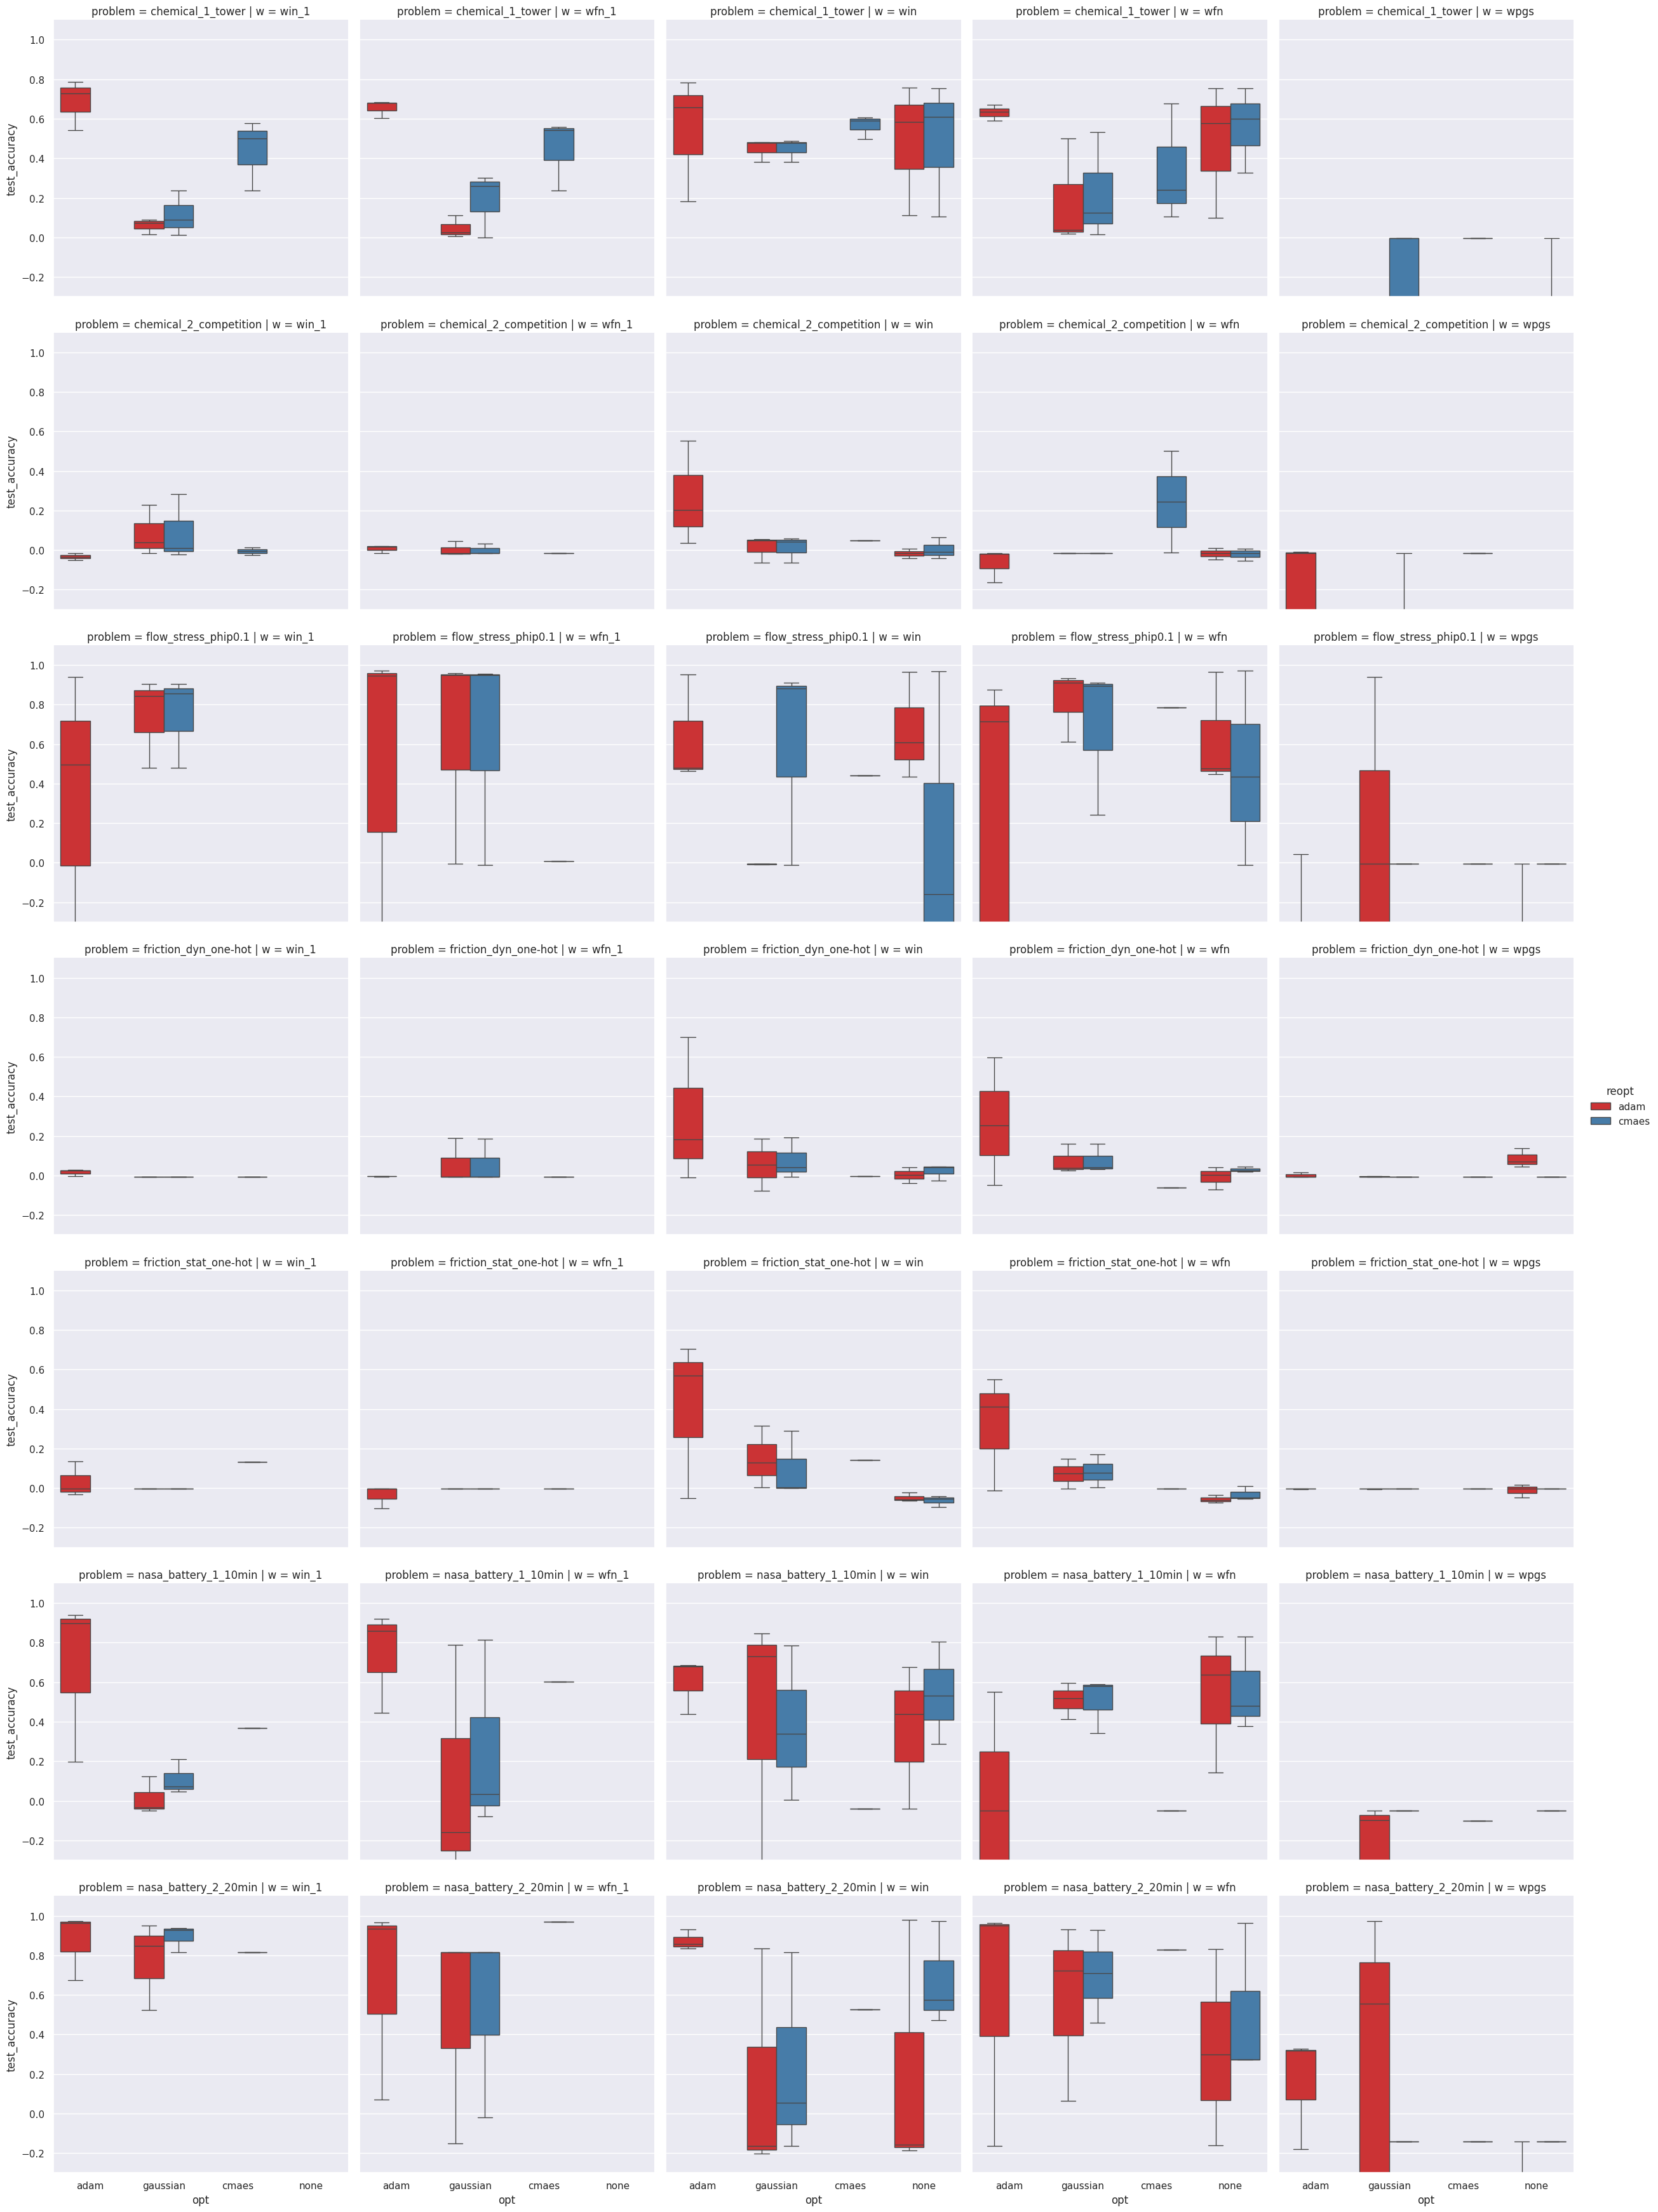

In [39]:
sns.catplot(x="opt", y="test_accuracy", hue="reopt", data=reopt_df, col="w", row="problem", kind="box", palette="Set1")
plt.ylim(-.3, 1.1)
plt.show()

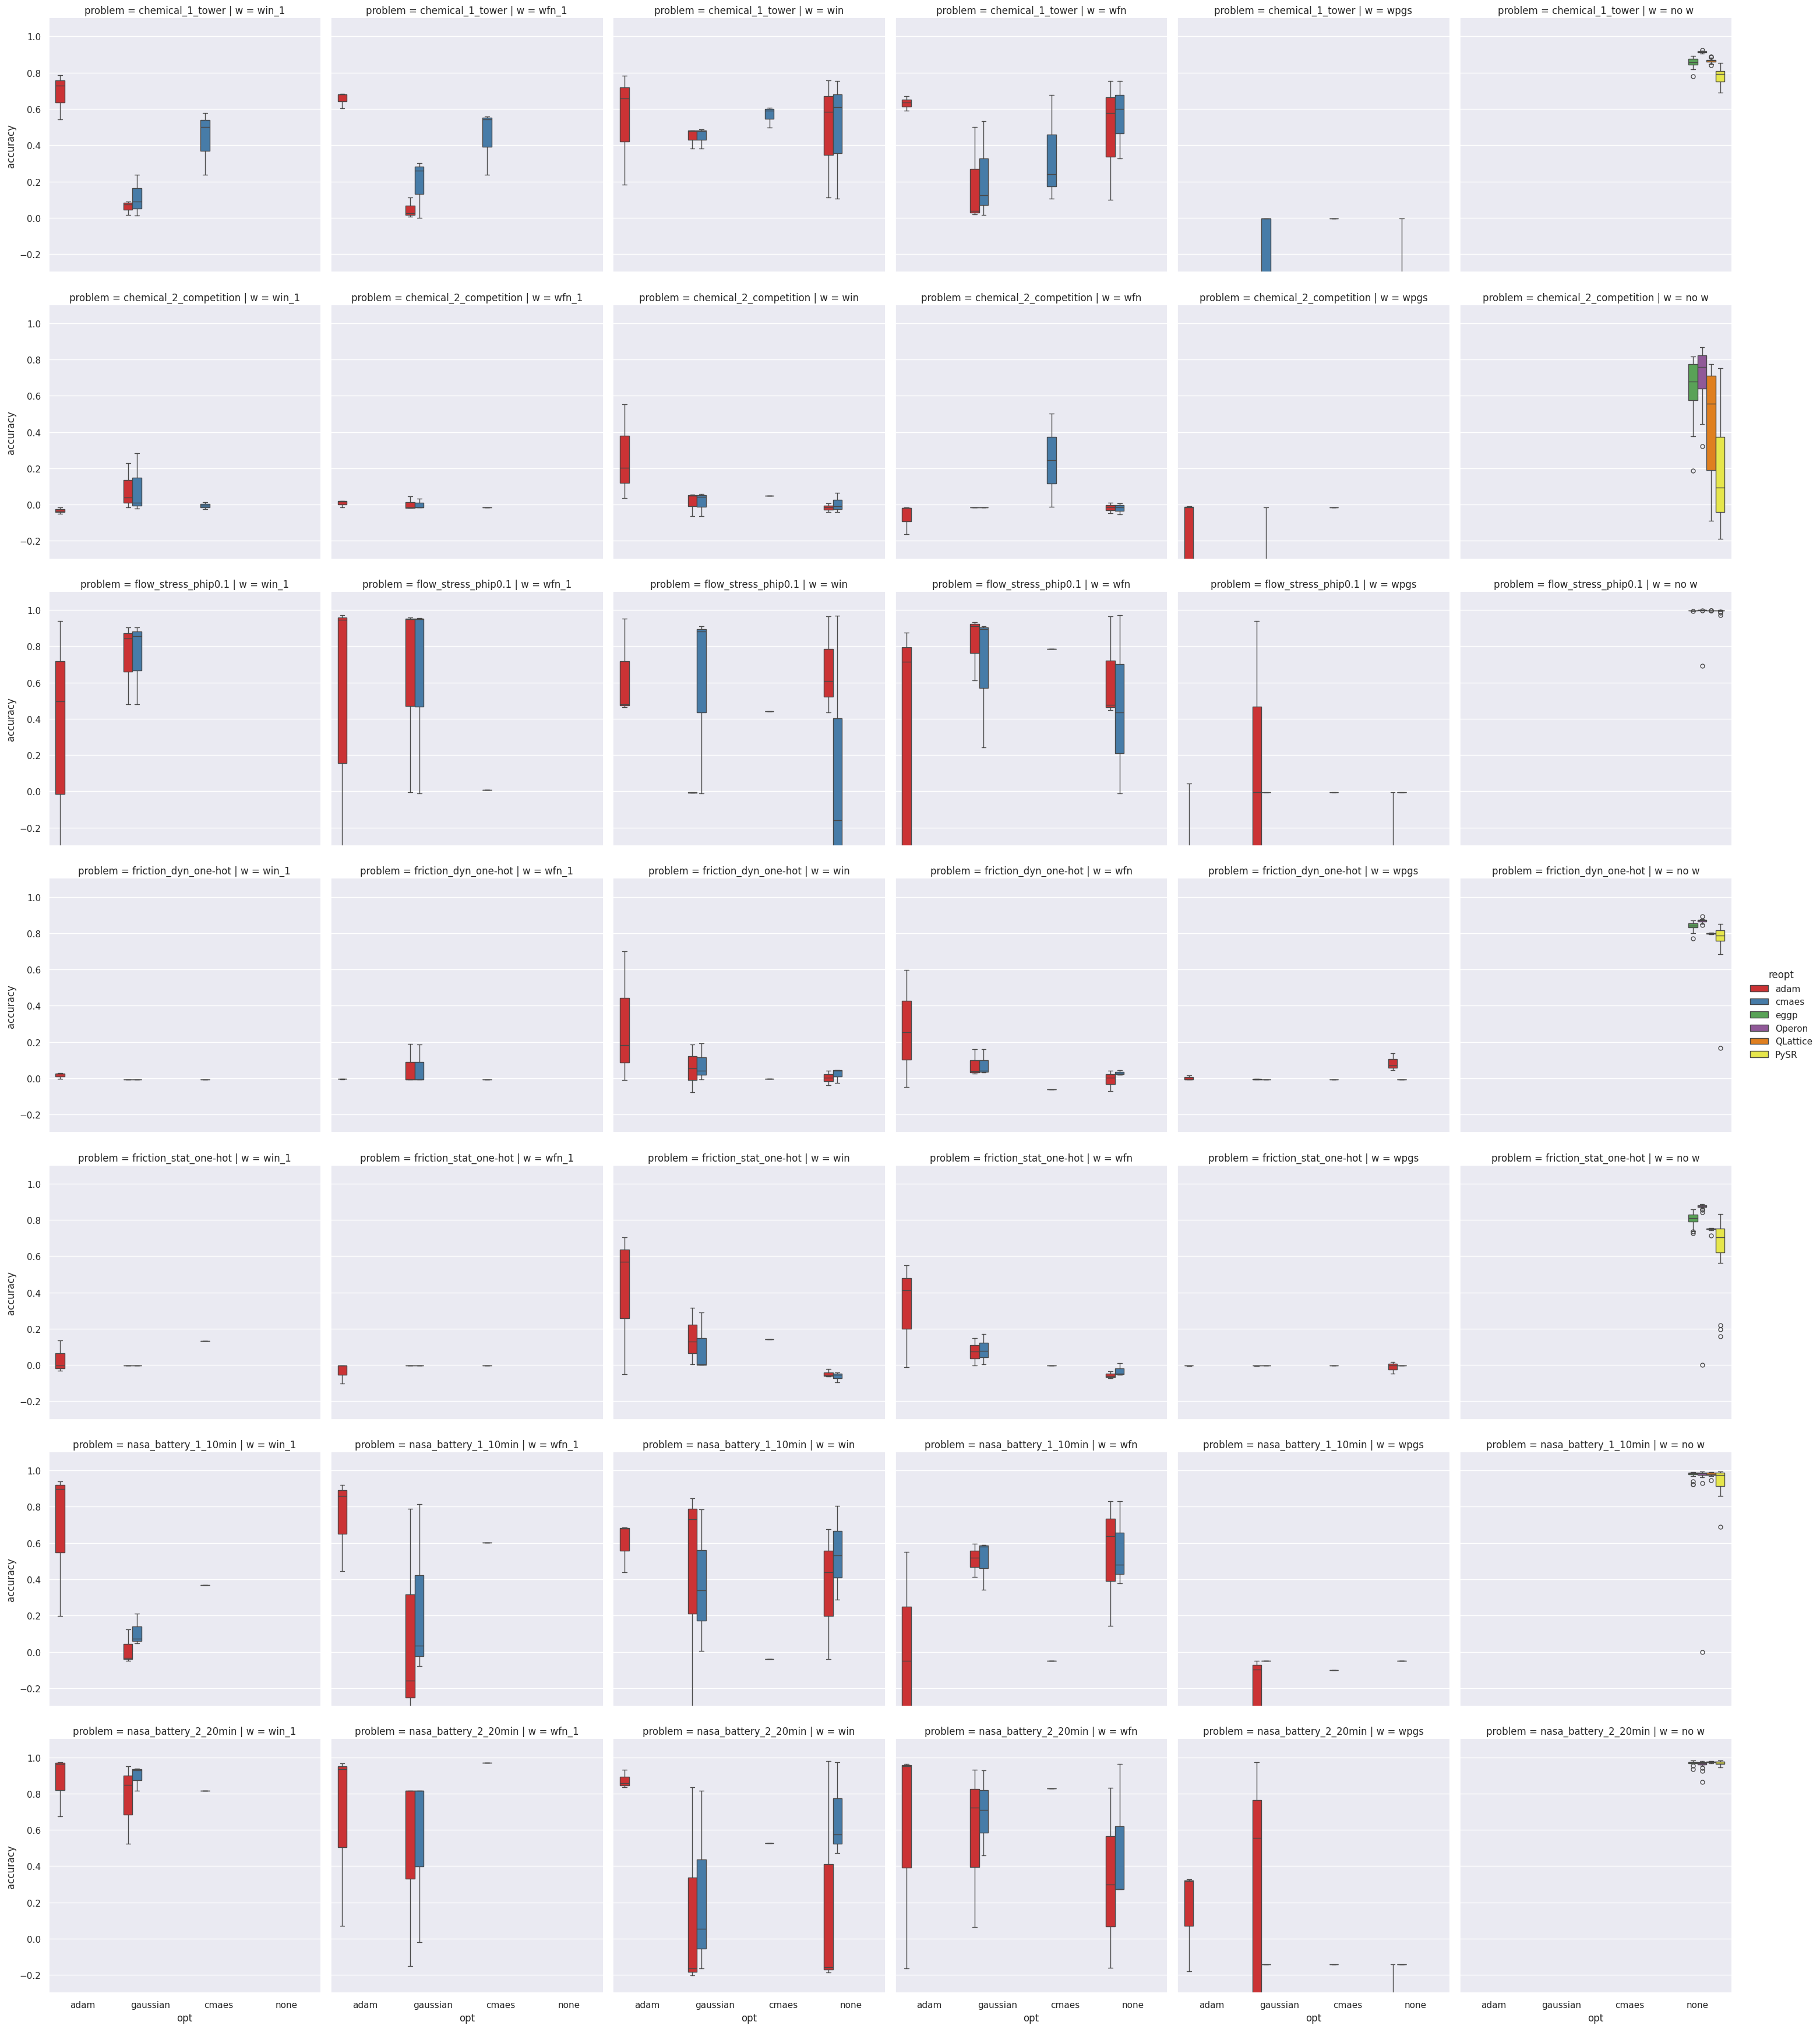

In [23]:
sns.catplot(data=reopt_df_and_baseline, x="opt", y="accuracy", hue="reopt", col="w", row="problem", kind="box", palette="Set1")
plt.ylim(-.3, 1.1)
plt.show()

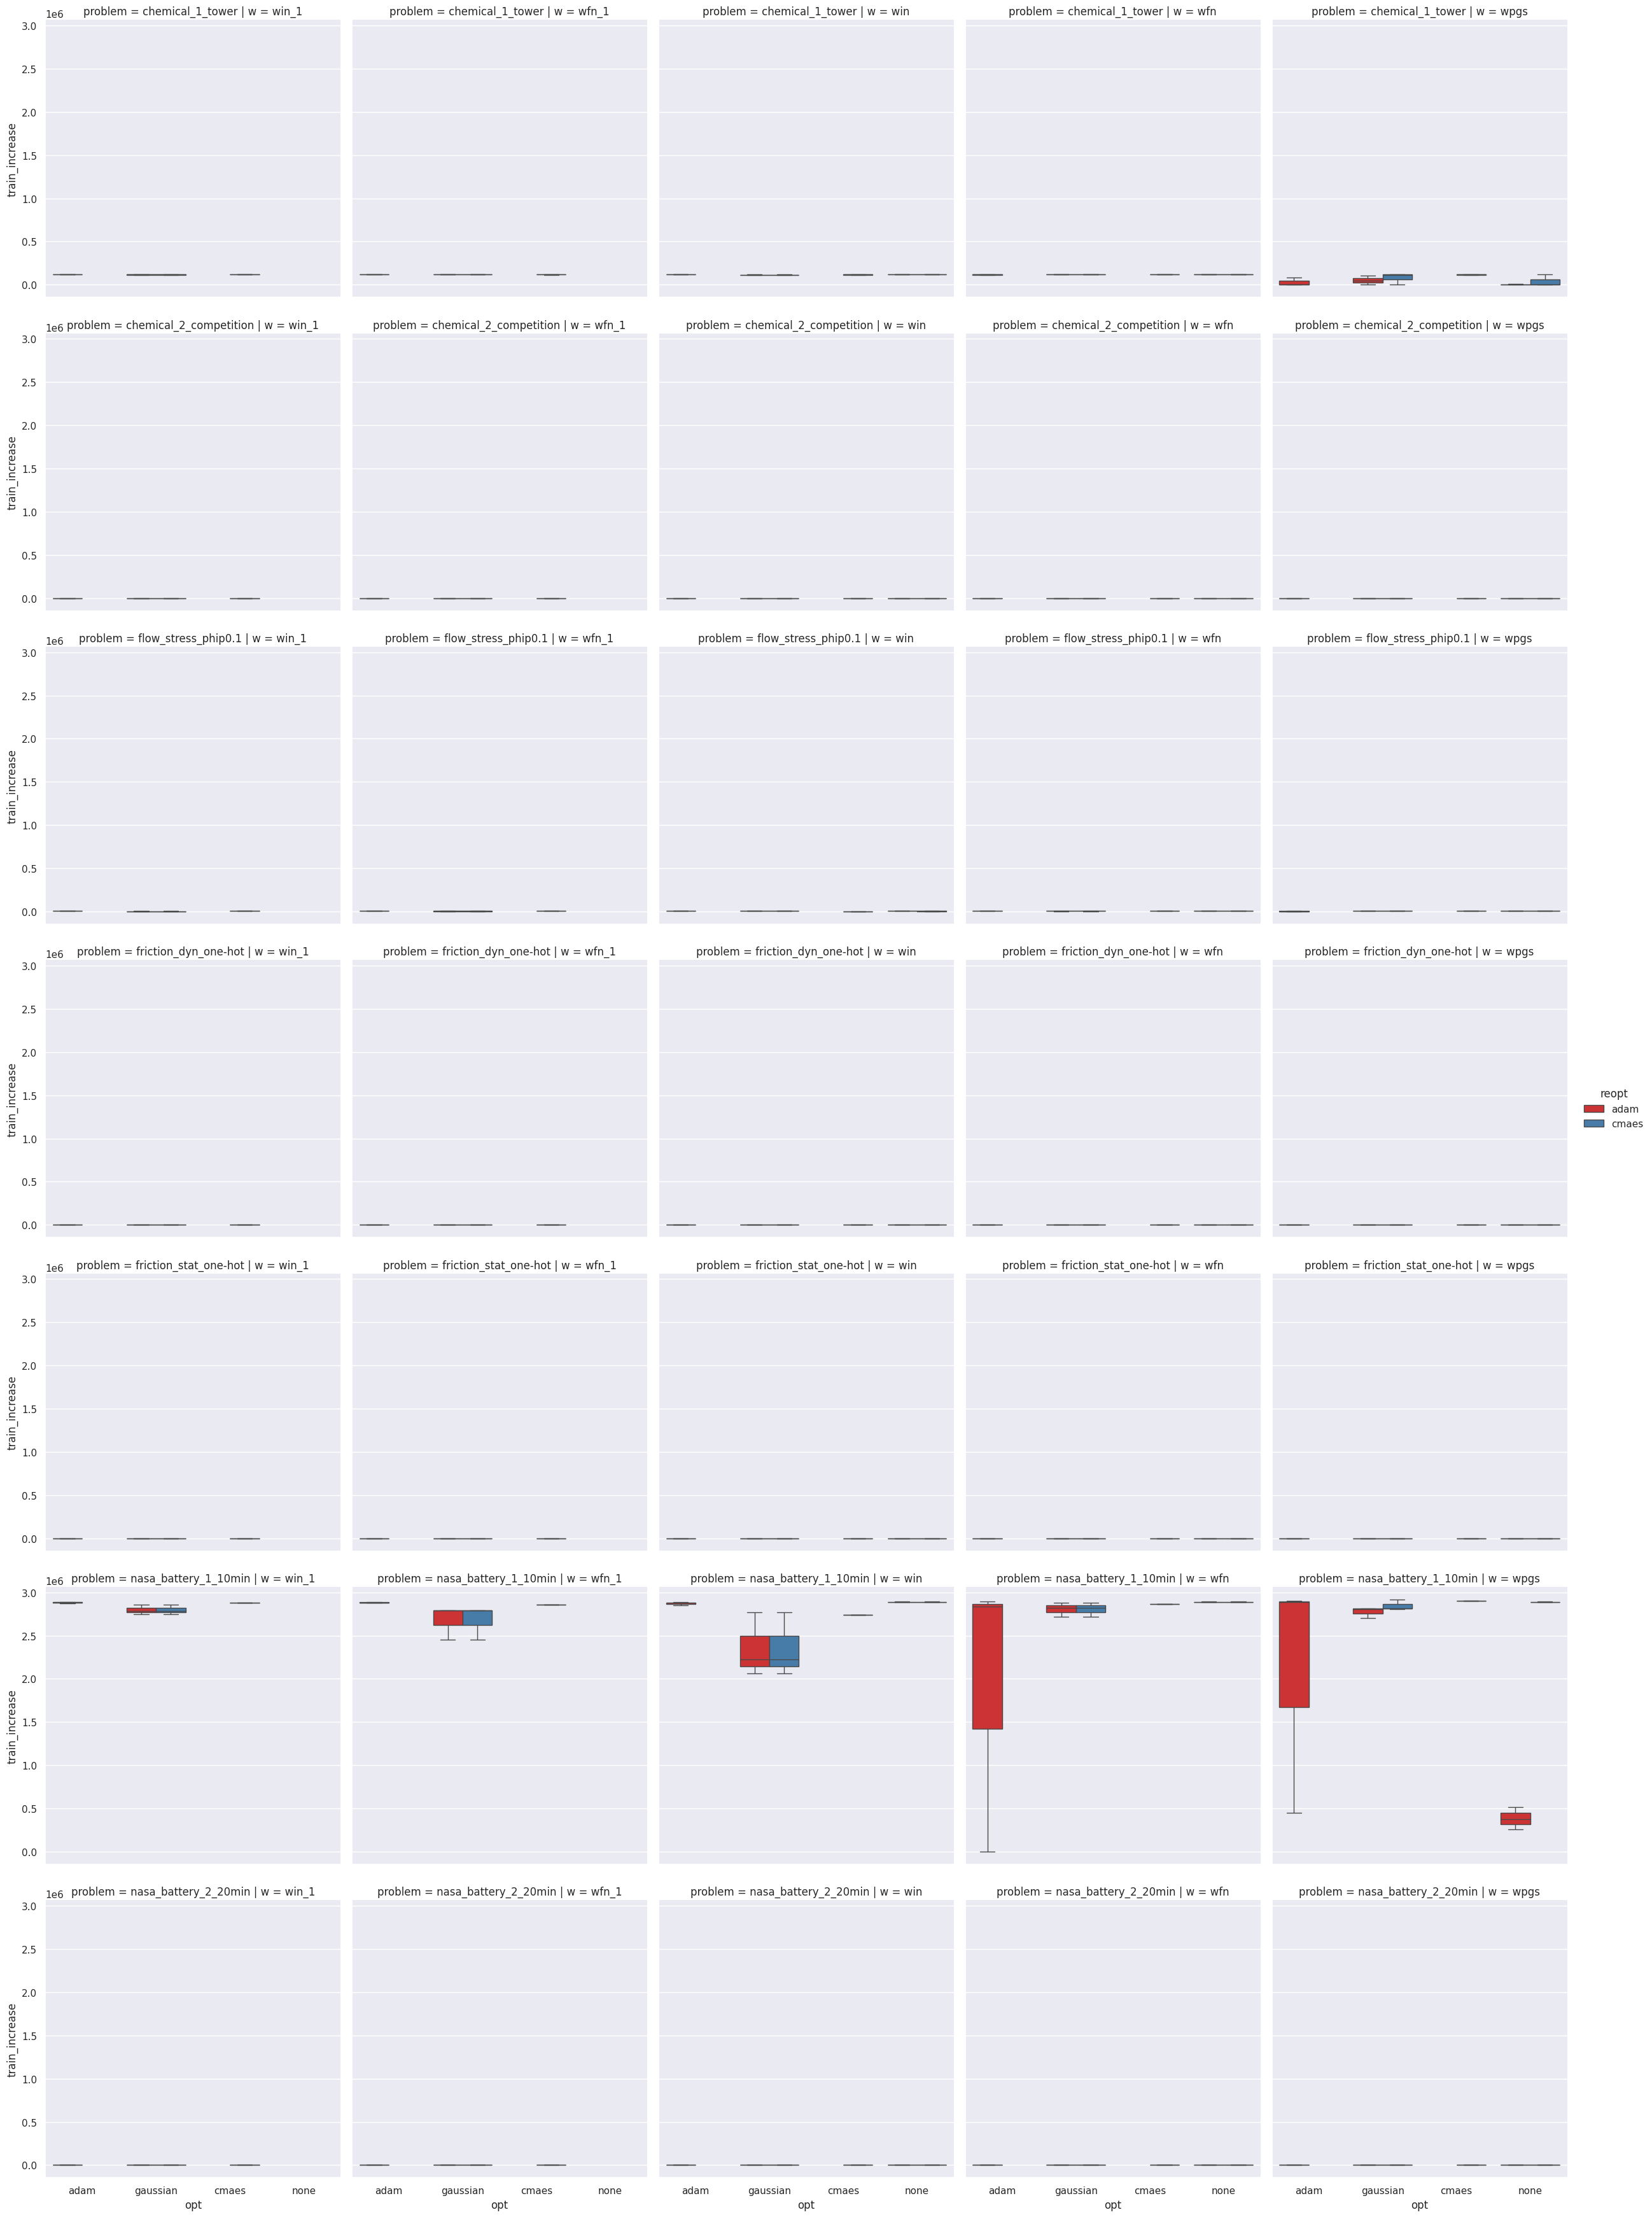

In [41]:
sns.catplot(x="opt", y="train_increase", hue="reopt", data=reopt_df, col="w", row="problem", kind="box", palette="Set1")
plt.show()

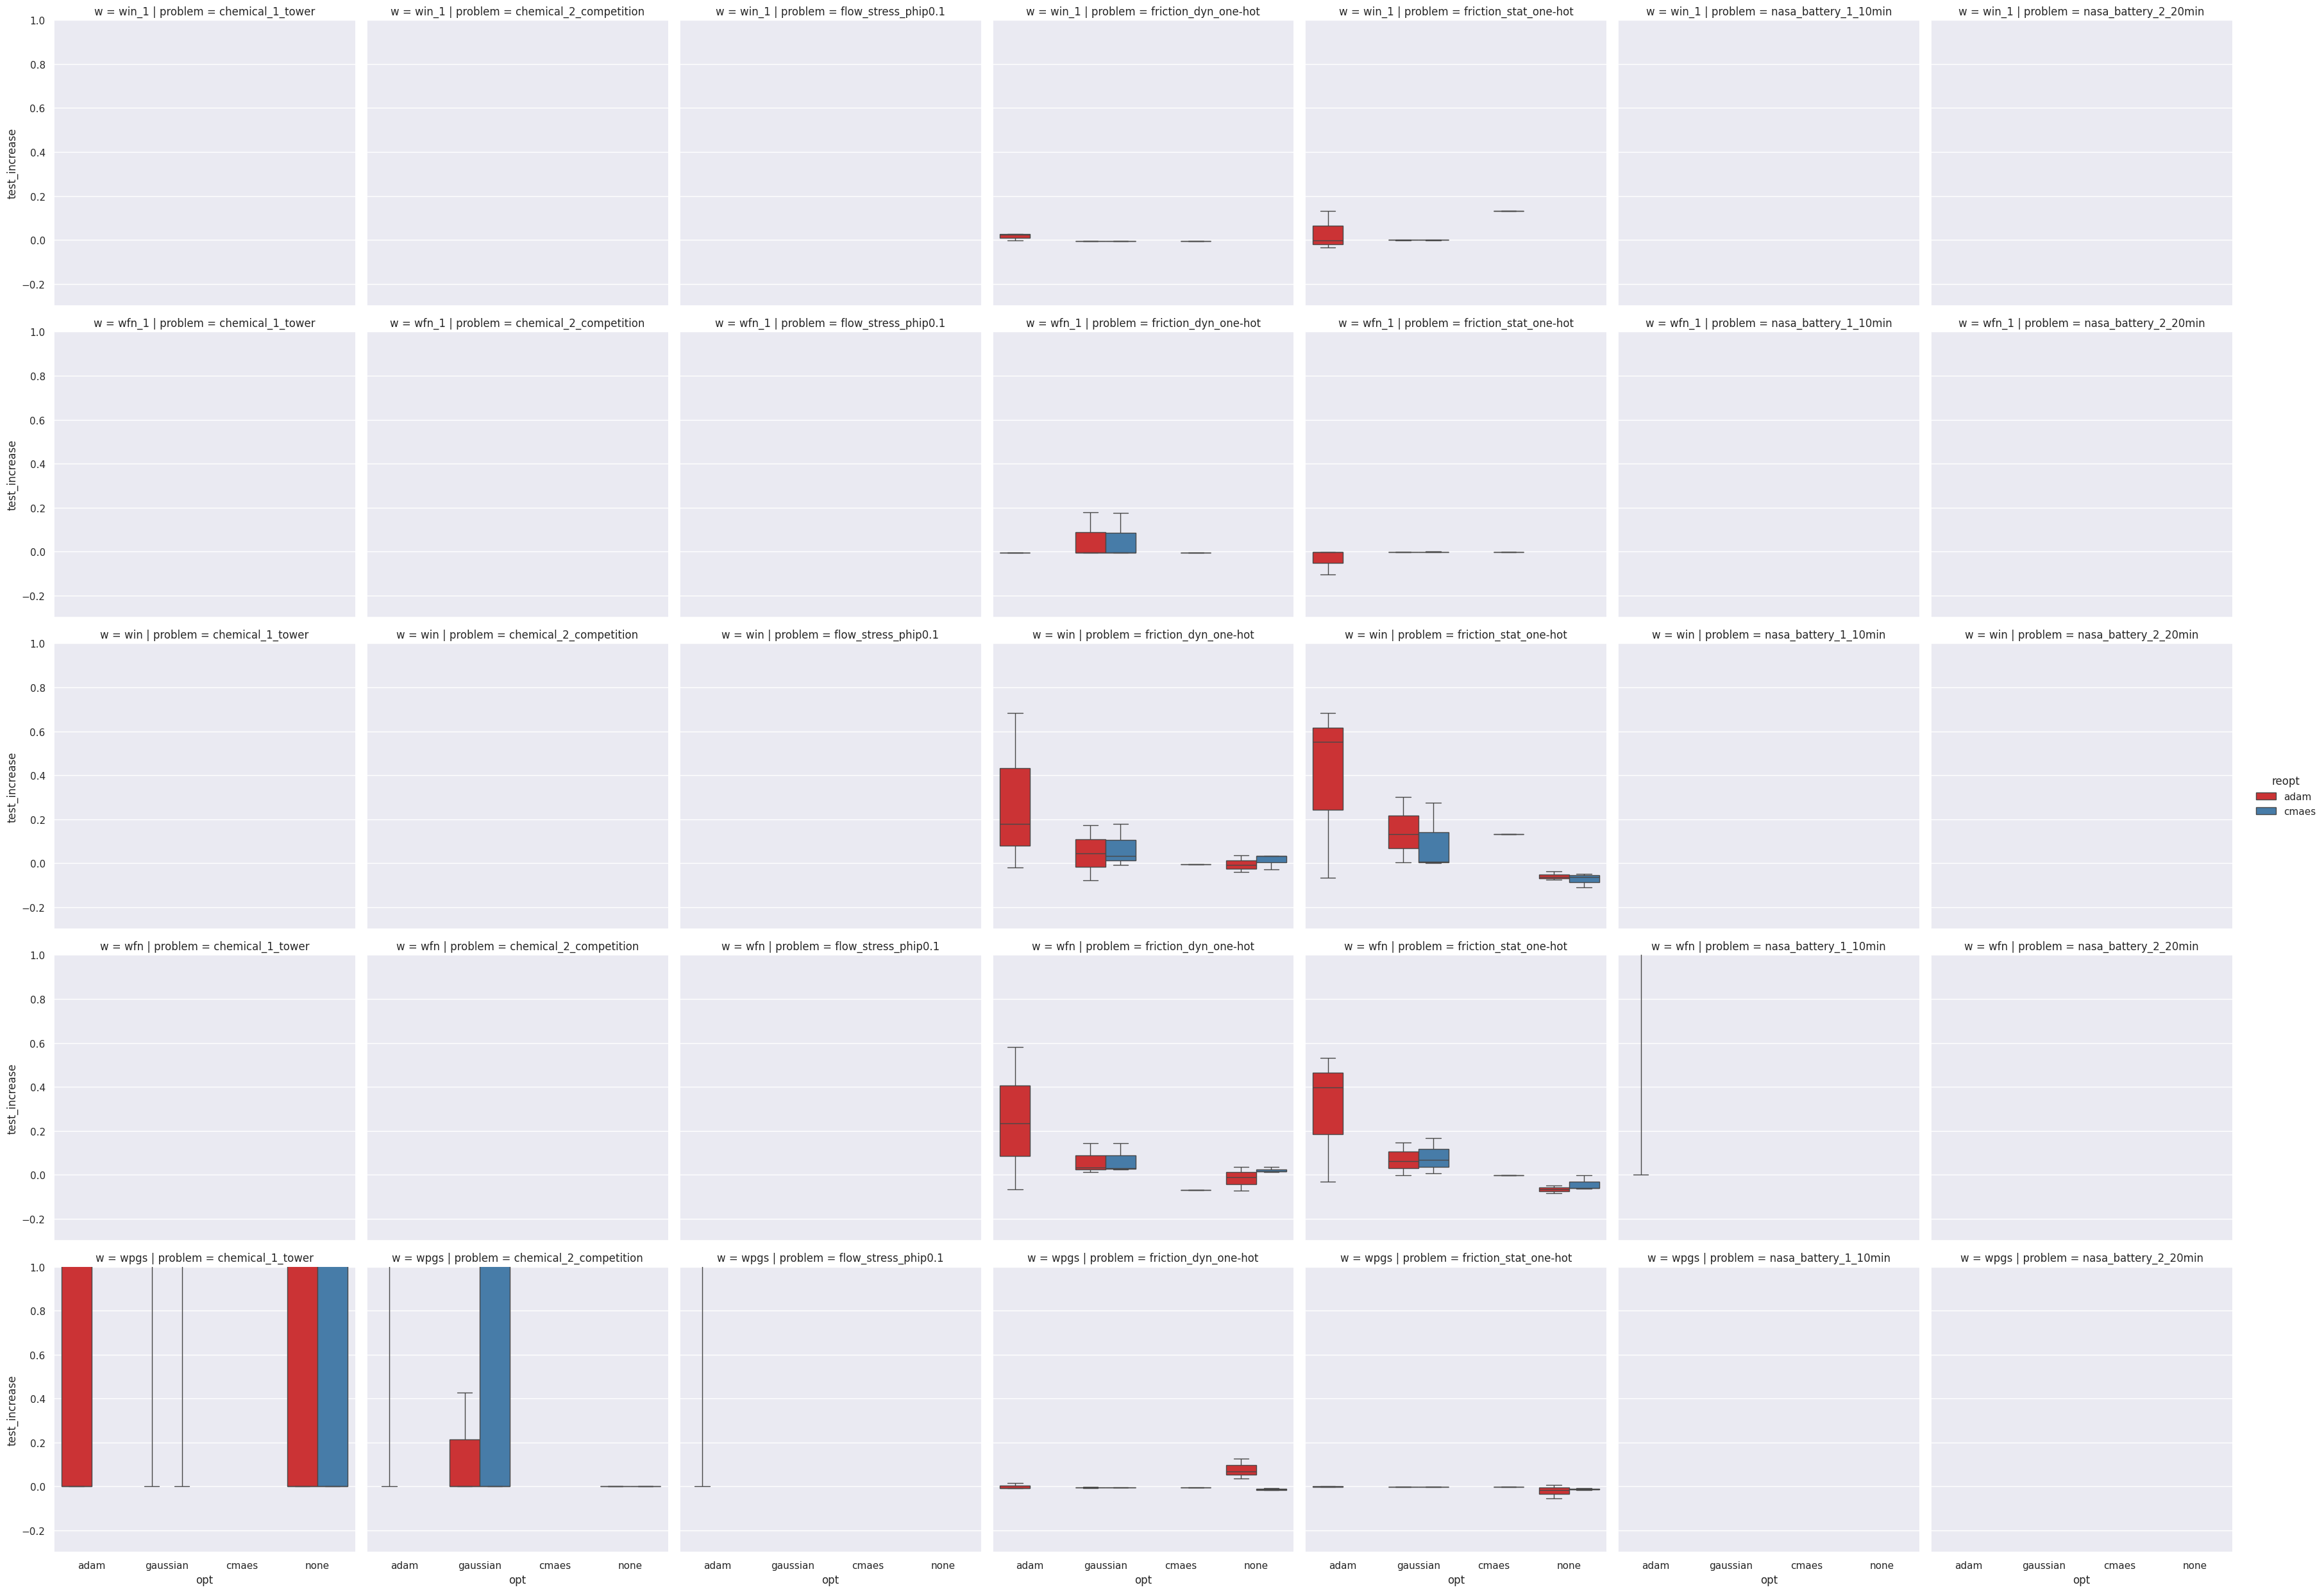

In [10]:
sns.catplot(x="opt", y="test_increase", hue="reopt", data=reopt_df, col="problem", row="w", kind="box", palette="Set1")
plt.ylim(-.3, 1.)
plt.show()